Target SNR = 20 dB, gain = 0.10, Mixing SNR=20.00


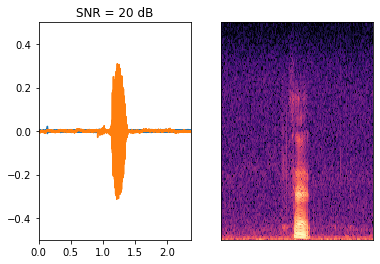

Target SNR = 10 dB, gain = 0.32, Mixing SNR=10.00


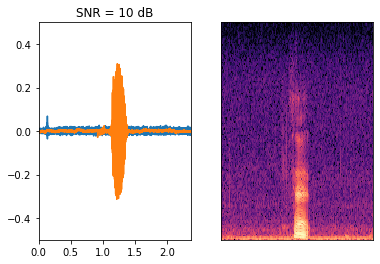

Target SNR = 0 dB, gain = 1.00, Mixing SNR=-0.00


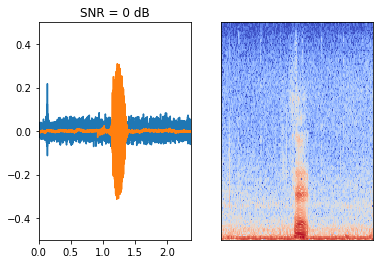

Target SNR = -10 dB, gain = 3.16, Mixing SNR=-10.00


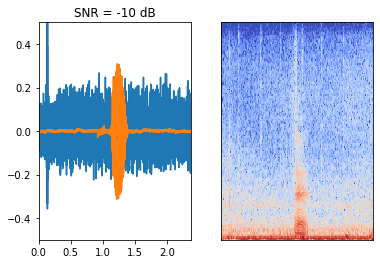

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import torchaudio
import torch


wav_path = r"./gjang-kdigits0-3.wav"
wav, sr = librosa.load(wav_path, sr=16000)
noise_path = r"./car.wav"
noise, sr = librosa.load(noise_path, sr=16000)

Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
Ns = int(sr*Ts)    # shift number of samples
Nf = int(sr*Tf)    # frame number of samples
NFFT = int(2**(np.ceil(np.log2(Nf))))
hNo = NFFT//2+1

sig_w = np.sqrt(np.mean(wav ** 2))
sig_n = np.sqrt(np.mean(noise[:len(wav)] ** 2))
mixsnrs = np.array([20, 10, 0, -10])
mixedSig = []
mixedWavfiles = []


for snr in mixsnrs:
    gain = 10**(-snr / 20)
    n = noise[:len(wav)] / sig_n * sig_w * gain
    mixedWav = wav + n
    mixedSig.append(mixedWav)
    print('Target SNR = %.0f dB, gain = %.2f, Mixing SNR=%.2f' % (
    snr, gain, 10 * np.log10(np.sum(wav ** 2) / np.sum(n ** 2))))

    stft = librosa.stft(mixedWav, n_fft=Nf, hop_length=Ns)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    # draw
    plt.figure()
    plt.subplot(1, 2, 1)
    xscale = np.arange(len(n)) / sr
    plt.plot(xscale, n);
    plt.plot(xscale, wav);
    plt.xlim(0, len(wav) / sr);
    plt.ylim(-0.5, 0.5)
    plt.title('SNR = %.0f dB' % (snr))
    plt.subplot(1, 2, 2)
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=Ns)
    plt.show()

    # save the mixed file
    torchaudio.save('./mix%.fdb.wav' % (snr), torch.tensor(mixedWav).unsqueeze(0), sr)
